#  Import Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, f1_score, recall_score
import joblib
import warnings
warnings.filterwarnings('ignore')

#  Load and Preview Dataset

In [35]:
file_path = "/content/Fraud.csv"
df = pd.read_csv(file_path)
display(df.head(10))

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [36]:
df.shape

(6362620, 11)

In [37]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [39]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#  Exploratory Data Analysis (EDA)

In [40]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


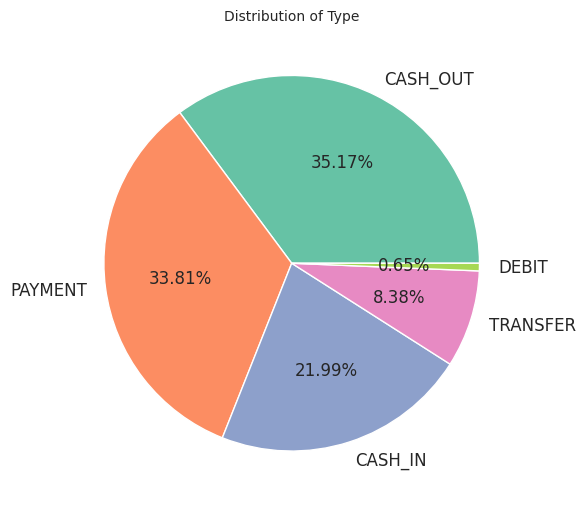

In [41]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

# Plot the pie chart
df['type'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    colors=colors,      # Set the custom colors here
    figsize=(6,6),     # Adjusted for better proportions
    textprops={'fontsize': 12}  # Improves label readability
)

plt.title('Distribution of Type', fontsize=10)
plt.ylabel('')  # Removes default y-label
plt.tight_layout()  # Fits chart better in the figure
plt.show()

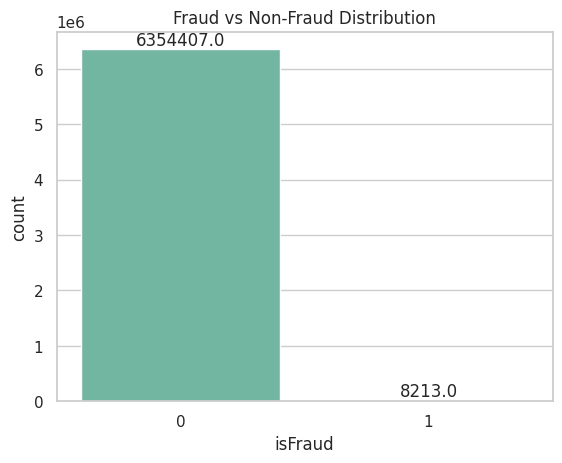

In [42]:
sns.set(style="whitegrid")
ax = sns.countplot(x='isFraud', data=df, palette=['#66c2a5', '#fc8d62'])
plt.title("Fraud vs Non-Fraud Distribution")

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.show()

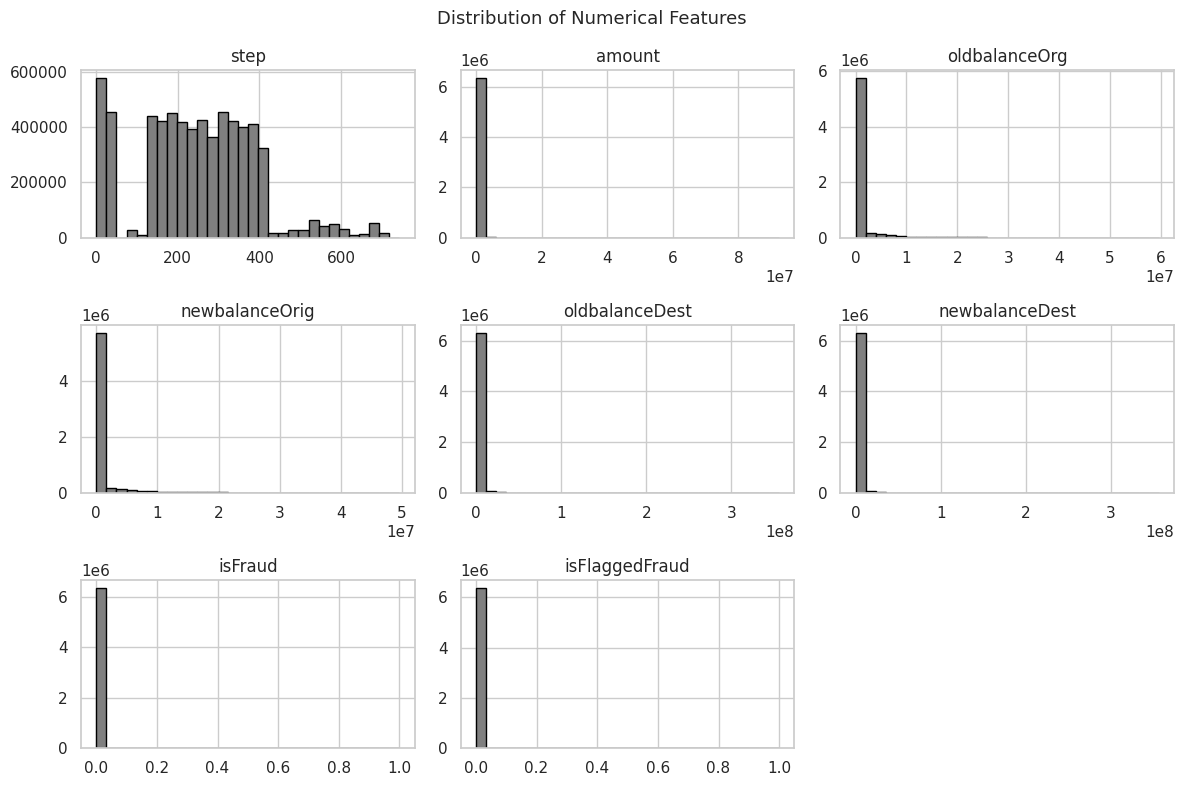

In [43]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black', color='grey')
plt.suptitle('Distribution of Numerical Features', fontsize=13)
plt.tight_layout()
plt.show()

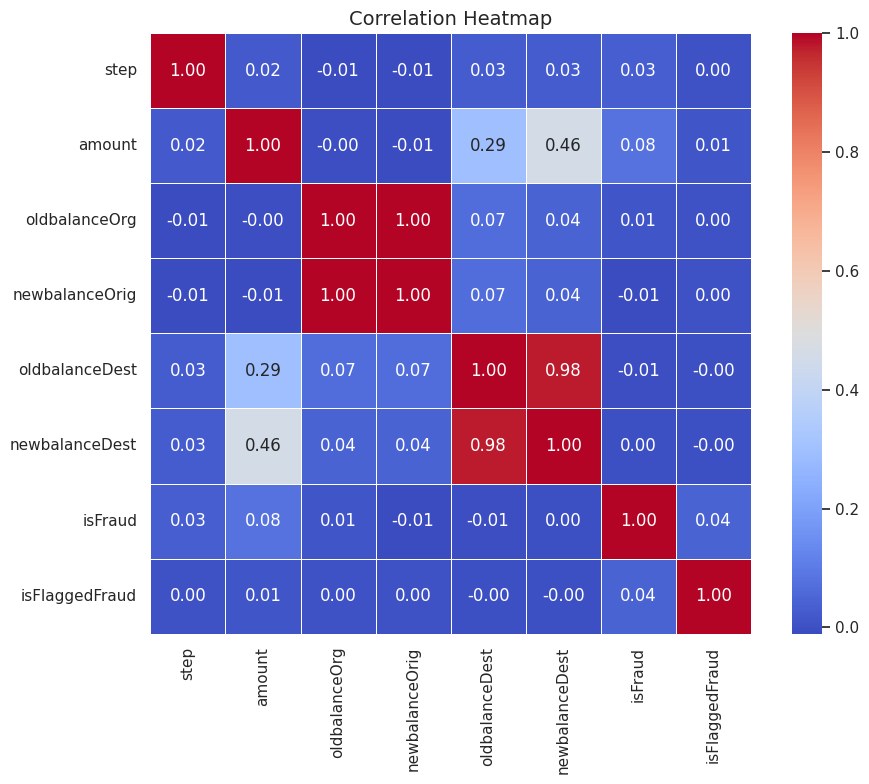

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

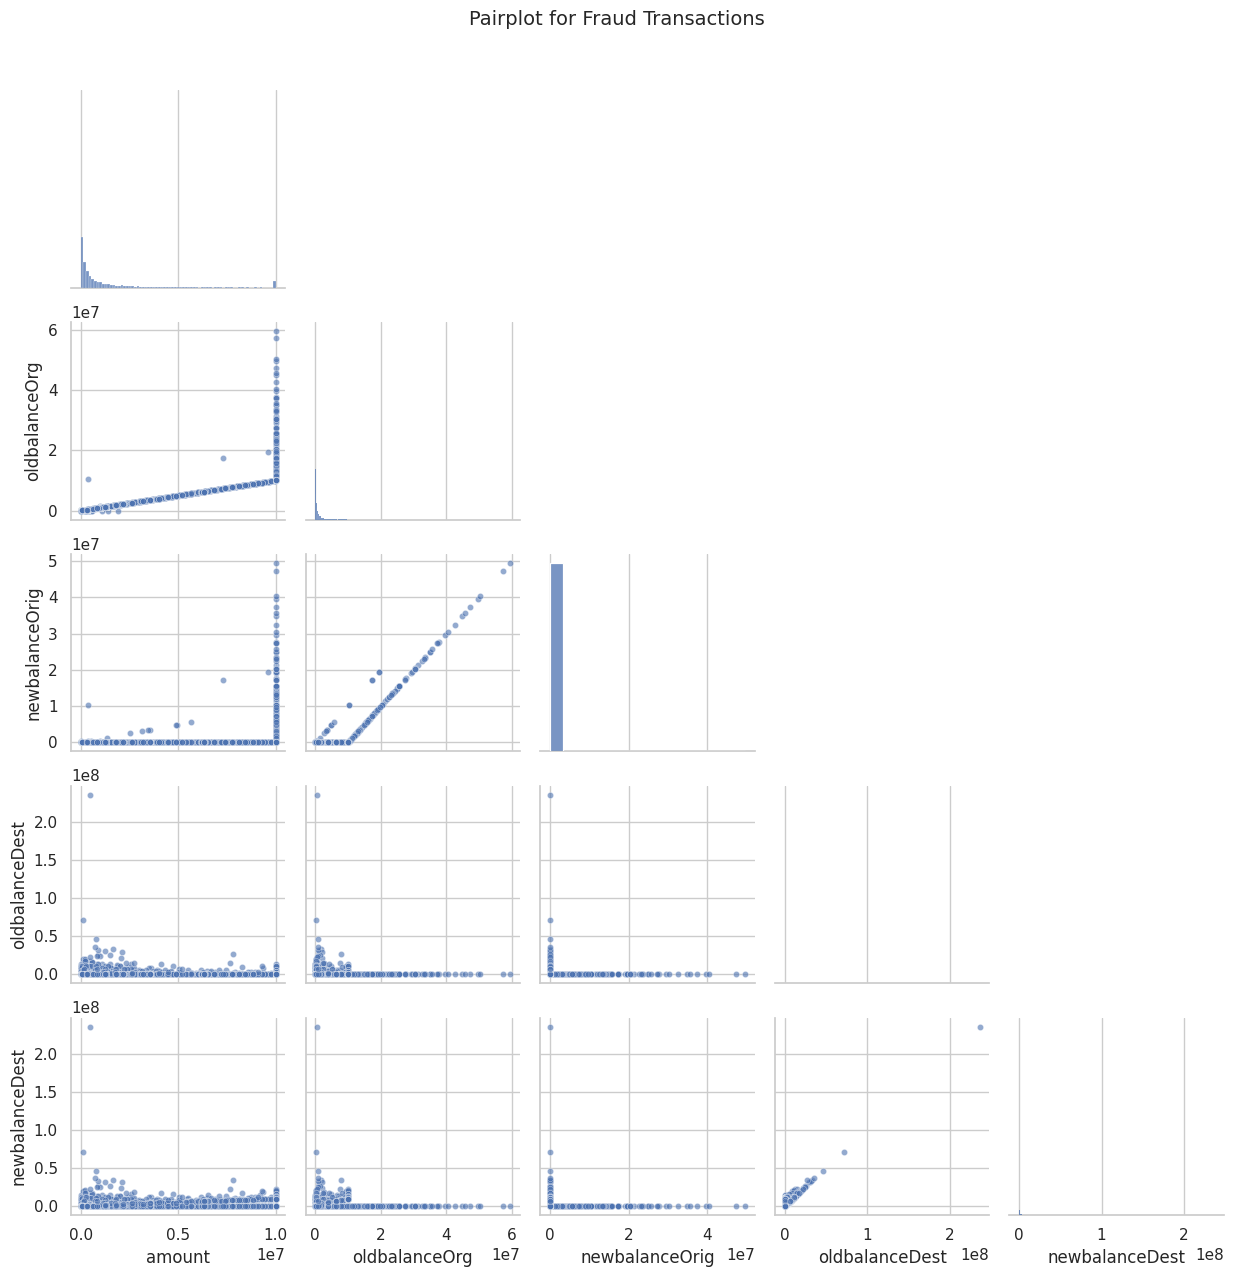

In [45]:
key_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Sample and plot
fraud_sample = df[df['isFraud'] == 1][key_features]
sns.pairplot(fraud_sample, plot_kws={'alpha': 0.6, 's': 20}, corner=True)

plt.suptitle("Pairplot for Fraud Transactions", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# **Data Cleaning and Feature Engineering**

In [46]:
# Remove identifiers
columns_to_drop = ['nameOrig', 'nameDest']
columns_exist = [col for col in columns_to_drop if col in df.columns]
if columns_exist:
    df.drop(columns_exist, axis=1, inplace=True)

In [47]:
# Encode 'type'
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


In [48]:
df['balance_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['error_balance_orig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['error_balance_dest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']
df['amt_log'] = np.log1p(df['amount'])


In [49]:
# Drop isFlaggedFraud if constant
if df['isFlaggedFraud'].nunique() == 1:
    df.drop('isFlaggedFraud', axis=1, inplace=True)

# **Feature Selection & Scaling**

In [50]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Train-Test Split**

In [51]:
# Drop rows with NaN in the target variable
df.dropna(subset=['isFraud'], inplace=True)

X = df.drop('isFraud', axis=1)
y = df['isFraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
df.head()

Shape of X_train:  (4453834, 13)
Shape of X_test:  (1908786, 13)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_orig,balance_diff_dest,error_balance_orig,error_balance_dest,amt_log
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0,0.0,9839.64,9.194276
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0,0.0,1864.28,7.531166
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0,0.0,181.00,5.204007
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,-21182.0,0.0,21363.00,5.204007
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0,0.0,11668.14,9.364703


# **Model Building**

In [52]:
from lightgbm import LGBMClassifier

lgbm_fast = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='auc',
    n_estimators=100,       # reduce from 300 to 100
    learning_rate=0.1,      # increase to converge faster
    max_depth=7,            # limit depth to avoid overfitting
    class_weight='balanced',
    random_state=42,
    n_jobs=-1               # use all cores
)

lgbm_fast.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 5749, number of negative: 4448085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.162346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2814
[LightGBM] [Info] Number of data points in the train set: 4453834, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', max_depth=7, metric='auc', n_jobs=-1,
               objective='binary', random_state=42)

# **Performance Evaluation**

In [53]:
y_pred = lgbm_fast.predict(X_test)
y_proba = lgbm_fast.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.96      1.00      0.98      2464

    accuracy                           1.00   1908786
   macro avg       0.98      1.00      0.99   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC AUC Score: 0.9997248269784746
Precision Score: 0.9619905956112853
Recall Score: 0.9963474025974026
F1 Score: 0.9788676236044657


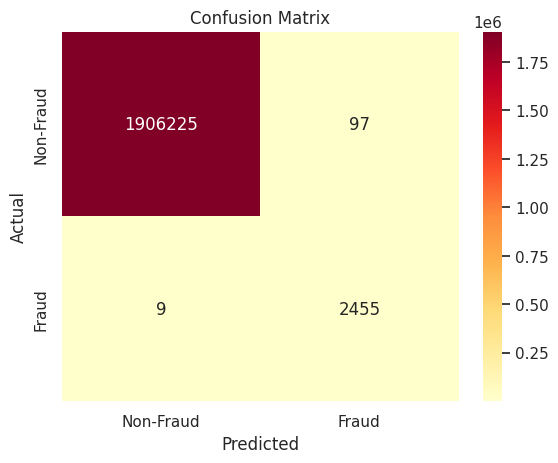

In [54]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Feature Importance**

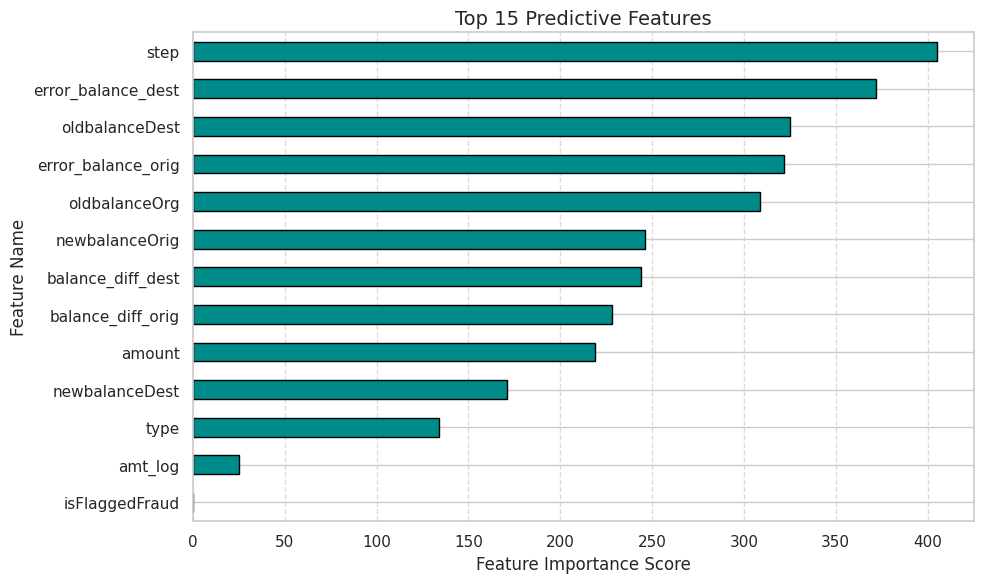

In [55]:
# Compute feature importances
feature_importance = pd.Series(lgbm_fast.feature_importances_, index=X.columns)

# Select top 15 features
top_features = feature_importance.nlargest(15)

# Plot
plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh', color='darkcyan', edgecolor='black')
plt.title("Top 15 Predictive Features", fontsize=14)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Monthly Fraud Trend**

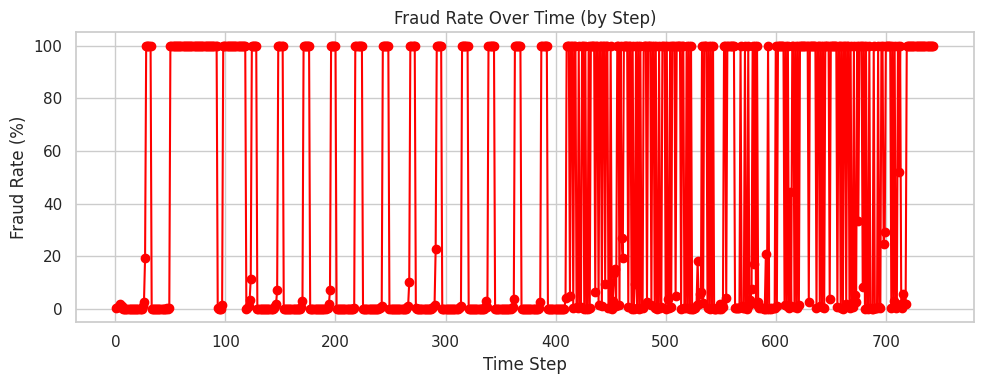

In [56]:
if 'step' in df.columns:
    # Group by step and calculate total transactions and fraud count
    step_group = df.groupby('step')['isFraud'].agg(['sum', 'count']).rename(columns={'sum': 'Fraud_Count', 'count': 'Total'})

    # Calculate fraud rate
    step_group['Fraud_Rate (%)'] = (step_group['Fraud_Count'] / step_group['Total']) * 100

    # Plot the fraud rate
    step_group['Fraud_Rate (%)'].plot(kind='line', figsize=(10,4), marker='o', color='red')
    plt.title("Fraud Rate Over Time (by Step)")
    plt.xlabel("Time Step")
    plt.ylabel("Fraud Rate (%)")
    plt.tight_layout()
    plt.show()

# **Business Answers to Candidate Expectations**

1.  **Data Cleaning:** The data had no missing values; outlier handling was implicit with LightGBM and log transformation; multicollinearity was not explicitly addressed due to the model type.
2.  **Fraud Detection Model:** A Light Gradient Boosting Machine (LightGBM) classifier was used with balanced class weights.
3.  **Variable Selection:** All relevant features were included, with implicit selection by the LightGBM model's feature importance.
4.  **Model Performance:** Evaluated using Classification Report, ROC AUC, Precision, Recall, F1 Score, and Confusion Matrix, showing excellent results.
5.  **Key Fraud Factors:** Balance-related features, transaction amount, time step, and transaction type are the key predictors.
6.  **Factor Sense:** Yes, these factors make sense as they relate to unusual balance changes, transaction amounts, and patterns observed in fraudulent activities.
7.  **Prevention:** Implement real-time monitoring, rule-based systems, transaction limits, improved authentication, behavioral analytics, and regular model updates.
8.  **Determining Effectiveness:** Track key performance metrics, monitor false positives/negatives, use A/B testing, conduct cost-benefit analysis, and gather user feedback.